<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io, color, filters
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import glob

# **Tugas Praktikum**

## **1. Gamma Correction**

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3
Menampilkan gambar asli dan gambar dengan gamma correction...


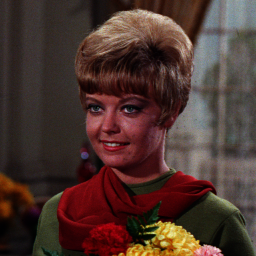

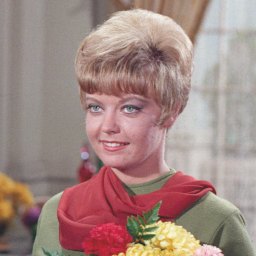

In [3]:
# Fungsi untuk melakukan gamma correction
def gamma_correction(image, gamma=1.0):
    # Membuat lookup table untuk setiap nilai pixel
    table = np.array([255 * ((i / 255.0) ** (1.0 / gamma)) for i in np.arange(0, 256)]).astype("uint8")
    # Menerapkan transformasi gamma menggunakan lookup table
    return cv.LUT(image, table)

print('Gamma Correction pada citra')
print('----------------------------------')

# Input nilai gamma dari user
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number. Menggunakan nilai default Gamma = 1.0')
    gamma = 1.0  # Default jika input tidak valid

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

if image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path gambar benar.")
else:
    # Menerapkan gamma correction dengan gamma yang diinput user
    gamma_corrected = gamma_correction(image, gamma=gamma)

    # Menampilkan gambar asli dan gambar dengan gamma correction
    cv2_imshow(image)  # Gambar asli
    cv2_imshow(gamma_corrected)  # Gambar setelah gamma correction

## **2. Simulasi Depth Image**

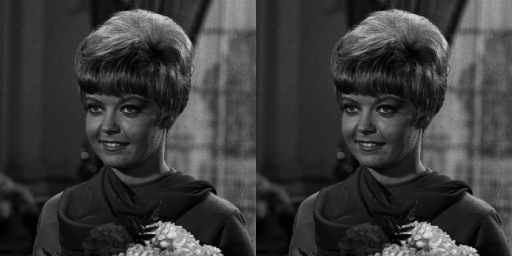

In [7]:
# Bit depth dan level kuantisasi
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam format grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Pastikan gambar berhasil dibaca
if original is None:
    print('Error: Gambar tidak ditemukan!')
    exit()

# Inisialisasi gambar dengan bit depth yang baru
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi berdasarkan bit depth
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        # Menghitung nilai output berdasarkan level kuantisasi
        depth_image[y, x] = round((original[y, x] / level) * level)

# Menampilkan gambar asli dan gambar hasil kuantisasi
final_frame = cv.hconcat([original, depth_image])

# Menampilkan hasil di Google Colab
cv2_imshow(final_frame)

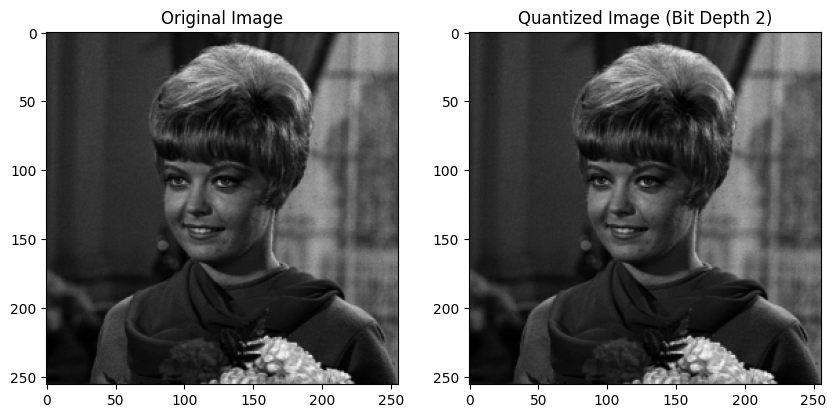

In [10]:
# Load the image
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if original is None:
    print('Error: Image not found!')
else:
    # Bit depth and quantization level
    bit_depth = 16
    level = 255 / (pow(2, bit_depth) - 1)

    # Initialize image with new bit depth
    depth_image = np.zeros(original.shape, original.dtype)

    # Perform quantization based on bit depth
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            depth_image[y, x] = round((original[y, x] / level) * level)

    # Display the original and quantized image using matplotlib
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Quantized Image (Bit Depth 2)')
    plt.imshow(depth_image, cmap='gray')

    plt.show()

## **3. Modul Average Denoising**

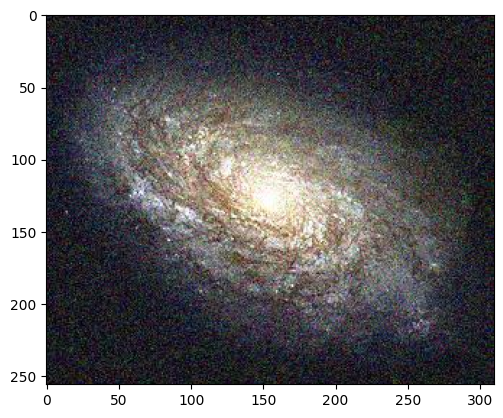

In [13]:
import glob
import cv2
import matplotlib.pyplot as plt

def load_images(folder_path, extensions=['.jpg', '.jpeg', '.png', '.bmp']):
    images = []
    for ext in extensions:
        images.extend(glob.glob(f"{folder_path}/*{ext}"))
    images = sorted(images)

    cv_img = []
    for img_path in images:
        try:
            img = cv2.imread(img_path)
            cv_img.append(img)
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")
    return cv_img

# Contoh penggunaan
folder_path = '/content/drive/MyDrive/PCVK/Images/noises'
images = load_images(folder_path)

# Menampilkan gambar pertama
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
import numpy as np

def average_denoise(img, window_size):
  """
  Applies average denoising to an image.

  Args:
      img: NumPy array representing the noisy image.
      window_size: Integer representing the size of the square window for averaging.

  Returns:
      A NumPy array representing the denoised image.
  """
  # Pad the image to handle borders
  pad_width = window_size // 2
  padded_img = np.pad(img, pad_width, mode='edge')

  # Create a copy of the image for output
  denoised_img = img.copy()

  # Iterate through each pixel (excluding borders)
  for i in range(pad_width, img.shape[0] + pad_width):
    for j in range(pad_width, img.shape[1] + pad_width):
      # Extract window around the pixel
      window = padded_img[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1]
      # Calculate average intensity of the window
      average_value = np.mean(window)
      # Set pixel value in denoised image to the average
      denoised_img[i - pad_width, j - pad_width] = average_value

  return denoised_img

def PSNR(img1, img2):
  """
  Calculates the Peak Signal-to-Noise Ratio (PSNR) between two images.

  Args:
      img1: NumPy array representing the first image.
      img2: NumPy array representing the second image.

  Returns:
      A float representing the PSNR value in dB.
  """
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    return 100

  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

def average_denoise_with_psnr(img, window_sizes):
  """
  Applies average denoising with different window sizes and calculates PSNR.

  Args:
      img: NumPy array representing the noisy image.
      window_sizes: List of integers representing the window sizes to evaluate.

  Returns:
      A dictionary containing PSNR values for each window size and the corresponding denoised images.
  """
  results = {}
  for window_size in window_sizes:
    denoised_img = average_denoise(img.copy(), window_size)
    psnr_value = PSNR(img, denoised_img)
    results[window_size] = {
      "denoised_img": denoised_img,
      "psnr": psnr_value
    }
  return results

In [17]:
import cv2
import numpy as np

def calculate_psnr(img1, img2):
    # ... (kode fungsi PSNR yang sama seperti sebelumnya)
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    return 100

  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

def average_denoise(img, window_size):
    # ... (kode fungsi average_denoise yang sama seperti sebelumnya)
    # Pad the image to handle borders
  pad_width = window_size // 2
  padded_img = np.pad(img, pad_width, mode='edge')

  # Create a copy of the image for output
  denoised_img = img.copy()

  # Iterate through each pixel (excluding borders)
  for i in range(pad_width, img.shape[0] + pad_width):
    for j in range(pad_width, img.shape[1] + pad_width):
      # Extract window around the pixel
      window = padded_img[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1]
      # Calculate average intensity of the window
      average_value = np.mean(window)
      # Set pixel value in denoised image to the average
      denoised_img[i - pad_width, j - pad_width] = average_value

  return denoised_img

# Load gambar asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Load gambar noise dari folder
noisy_images = load_images('/content/drive/MyDrive/PCVK/images/noises')

# List ukuran jendela untuk denoising
window_sizes = [5, 10, 20, 40, 80, 100]

for noisy_img in noisy_images:
    print("Noisy Image:")
    # Tampilkan gambar noise (opsional)
    # cv2.imshow('Noisy Image', noisy_img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    for window_size in window_sizes:
        denoised_img = average_denoise(noisy_img.copy(), window_size)
        psnr = calculate_psnr(original_img, denoised_img)
        print(f"Window size: {window_size}, PSNR: {psnr}")

        # Simpan atau tampilkan hasil denoising (opsional)
        cv2.imwrite(f'denoised_{window_size}.jpg', denoised_img)

## **4. Image Masking**

## **5. Image Masking with other operator**